In [66]:
import numpy as np
import matplotlib.pyplot as plt

In [65]:
# Assume that the output of a NN is given as h(x) = w^T x
number_of_features = 5
weights_vector_w = np.transpose(np.array([-0.1, -0.5, 0, 0.5, 0.1]))

print("The shape of the weight vector is = ", weights_vector_w.shape)
print("The weight vector is = ", weights_vector_w)

The shape of the weight vector is =  (5,)
The weight vector is =  [-0.1 -0.5  0.   0.5  0.1]


In [55]:
# Assume that we have a testing data point given along with its true label:
np.random.seed(seed=3)
x_test_sample = np.random.normal(loc = 0.0, scale=0.1, size=(number_of_features,))

# we can infer the predicted label by first computing the output as
output_h = np.dot(x_test_sample,weights_vector_w)

# use a signum function or a logic to get the preducted label as
predicted_label = np.sign(output_h)

# we can define a prediction model that returns the output_value, and the predicted label
def pred_model(weights_vector, input_sample):
  output_h = np.dot(input_sample,weights_vector)
  predicted_label = np.sign(output_h)
  return output_h, predicted_label
  

print("The test sample is ", x_test_sample)
print("The test sample output is ", [output_h])
print("The test sample predicted label is ", [predicted_label])

The test sample is  [ 0.17886285  0.04365099  0.00964975 -0.18634927 -0.02773882]
The test sample output is  [-0.1356602944532712]
The test sample predicted label is  [-1.0]


Next, we use $\eta = -y~\epsilon~\text{sign}(w)$ to fool the network w.r.t. the test example. We will use different values of $\epsilon$ to induce the label changing.

In [71]:
# define some range of values for the allowed perturbations
eps_range = np.arange(0.001,0.50, 0.001)

output_h_adv_save = []
predicted_label_adv_save = []
for eps in eps_range:

  # obtain the adversarial example: 
  x_test_sample_adv = x_test_sample - predicted_label * eps * np.sign(weights_vector_w)

  # obtain the predicted label for the perturbed example x_adv
  output_h_adv, predicted_label_adv = pred_model(weights_vector = weights_vector_w, input_sample = x_test_sample_adv)
  predicted_label_adv_save.append(predicted_label_adv)
  output_h_adv_save.append(output_h_adv)

  print("predicted label {} predicted label with perturbations = {}. Bound = {}. Output value = {}. Output value adv {}".format(predicted_label,predicted_label_adv, eps, round(output_h,2), round(output_h_adv,2)))


predicted label -1.0 predicted label with perturbations = -1.0. Bound = 0.001. Output value = -0.14. Output value adv -0.13
predicted label -1.0 predicted label with perturbations = -1.0. Bound = 0.002. Output value = -0.14. Output value adv -0.13
predicted label -1.0 predicted label with perturbations = -1.0. Bound = 0.003. Output value = -0.14. Output value adv -0.13
predicted label -1.0 predicted label with perturbations = -1.0. Bound = 0.004. Output value = -0.14. Output value adv -0.13
predicted label -1.0 predicted label with perturbations = -1.0. Bound = 0.005. Output value = -0.14. Output value adv -0.13
predicted label -1.0 predicted label with perturbations = -1.0. Bound = 0.006. Output value = -0.14. Output value adv -0.13
predicted label -1.0 predicted label with perturbations = -1.0. Bound = 0.007. Output value = -0.14. Output value adv -0.13
predicted label -1.0 predicted label with perturbations = -1.0. Bound = 0.008. Output value = -0.14. Output value adv -0.13
predicte

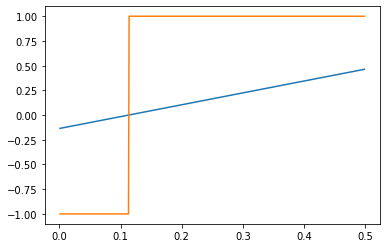

In [70]:
# Next, lets plot and obtain the epsilon that causes the damage...
# plot the data
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(eps_range, output_h_adv_save, color='tab:blue')
ax.plot(eps_range, predicted_label_adv_save, color='tab:orange')
plt.show()